# Loading Data

In [ ]:
!mkdir -p ~/.kaggle
!wget -O kaggle.json "https://www.dropbox.com/scl/fi/bc1hnijthabcn93ke82ef/kaggle-1.json?rlkey=16f6mcdnkryc0l43oy07k1ifc&st=esmiervl&dl=1"
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mexwell/heart-disease-dataset -p ./ --unzip


--2024-09-06 11:36:00--  https://www.dropbox.com/scl/fi/bc1hnijthabcn93ke82ef/kaggle-1.json?rlkey=16f6mcdnkryc0l43oy07k1ifc&st=esmiervl&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9073ec0141c306bea0dfa9b580.dl.dropboxusercontent.com/cd/0/inline/CaBk5nAwXq4BcpoHJveYIuN_B6UCMo-qj0tQSnJg8x0JtiW5T4Cp8foZEgLImlB546Z7oIUEIRmRTWy7Ft_cxF_vuQ_xAvhjzpatfpC8xuUD_s3-pAZRZgd0QENpez04d69ZVFafJvAs81PTk6v8o07Q/file?dl=1# [following]
--2024-09-06 11:36:01--  https://uc9073ec0141c306bea0dfa9b580.dl.dropboxusercontent.com/cd/0/inline/CaBk5nAwXq4BcpoHJveYIuN_B6UCMo-qj0tQSnJg8x0JtiW5T4Cp8foZEgLImlB546Z7oIUEIRmRTWy7Ft_cxF_vuQ_xAvhjzpatfpC8xuUD_s3-pAZRZgd0QENpez04d69ZVFafJvAs81PTk6v8o07Q/file?dl=1
Resolving uc9073ec0141c306bea0dfa9b580.dl.dropboxusercontent.com (uc9073ec0141c306bea0dfa9b580.dl.dropboxusercontent.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


# EDA

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Overview of the Dataset

# Check the data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:

# Check for any missing values
df.isnull().sum()


,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:

# 2. Summary Statistics

# Summary statistics for numerical columns
df.describe()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:

# Check the number of unique values in each column
df.nunique()

,0
age,50
sex,2
chest pain type,4
resting bp s,67
cholesterol,222
fasting blood sugar,2
resting ecg,3
max heart rate,119
exercise angina,2
oldpeak,53


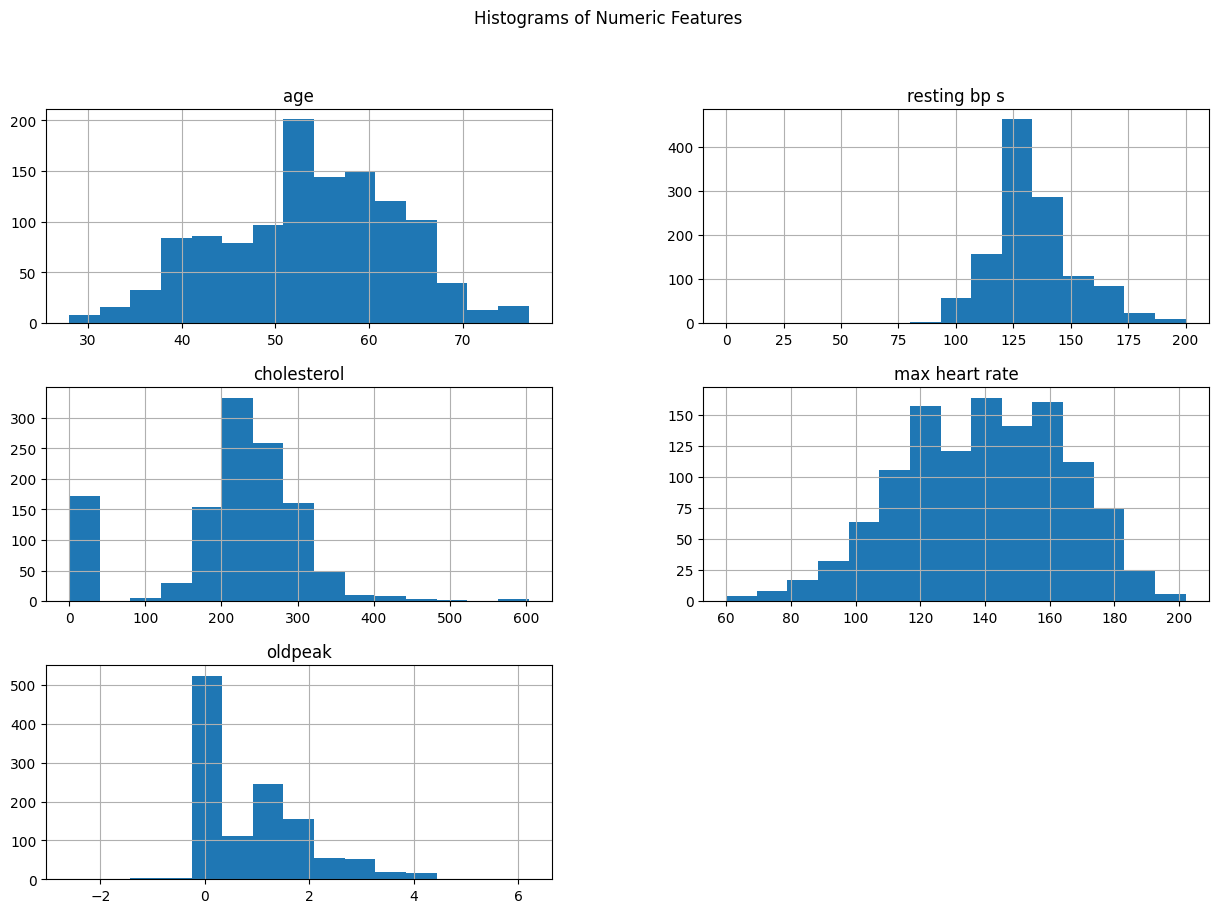

In [ ]:


# Distribution of numeric features
numeric_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 2))
plt.suptitle('Histograms of Numeric Features')
plt.show()

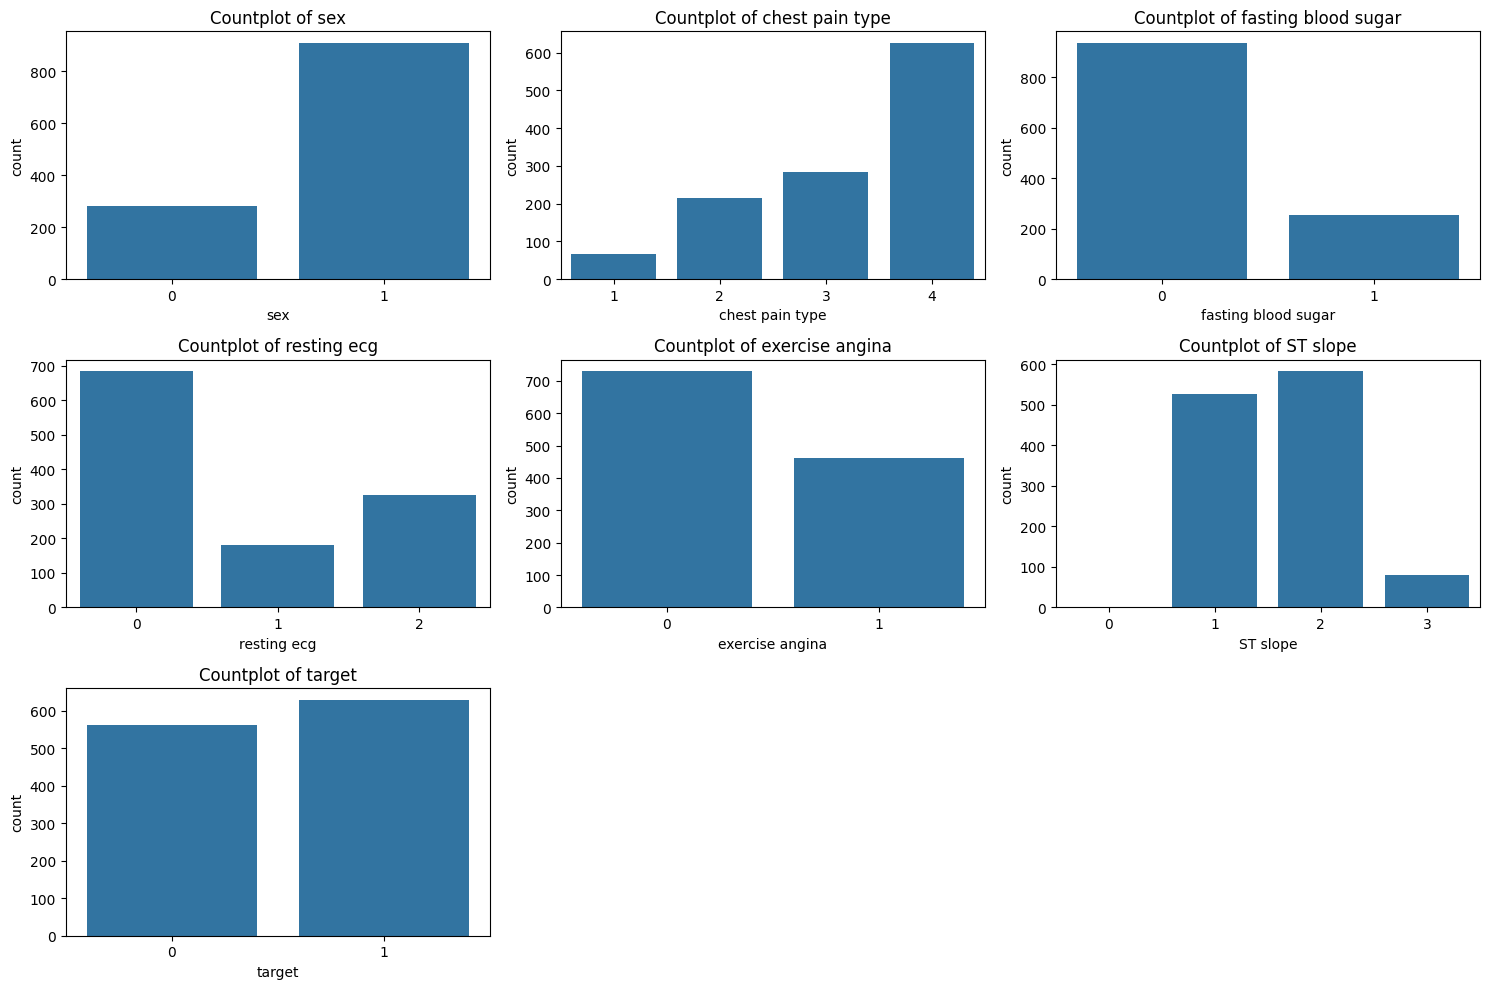

In [ ]:

# Distribution of categorical features
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[column])
    plt.title(f'Countplot of {column}')
plt.tight_layout()
plt.show()


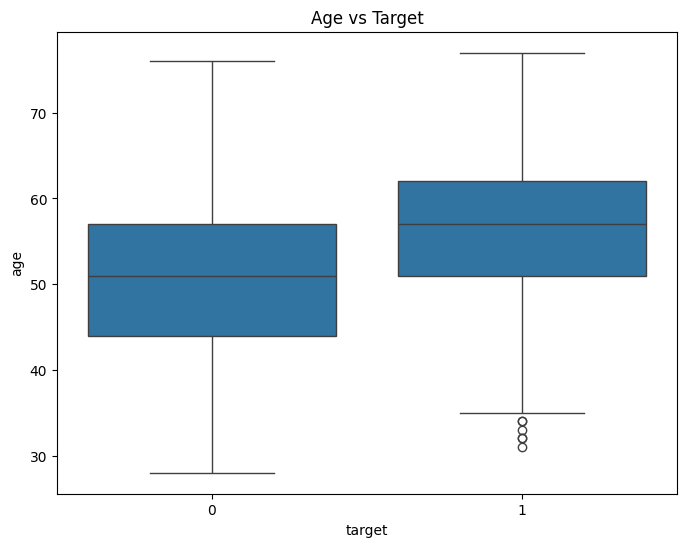

In [ ]:

# Boxplot of age vs target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age vs Target')
plt.show()


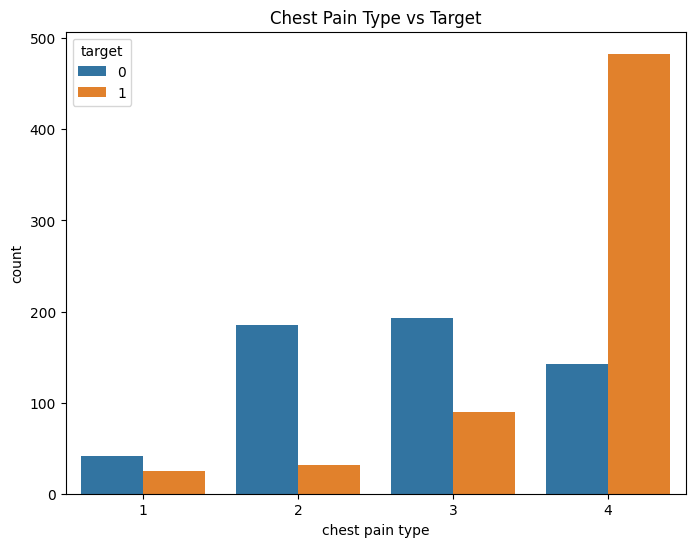

In [ ]:

# Chest pain type vs target
plt.figure(figsize=(8, 6))
sns.countplot(x='chest pain type', hue='target', data=df)
plt.title('Chest Pain Type vs Target')
plt.show()


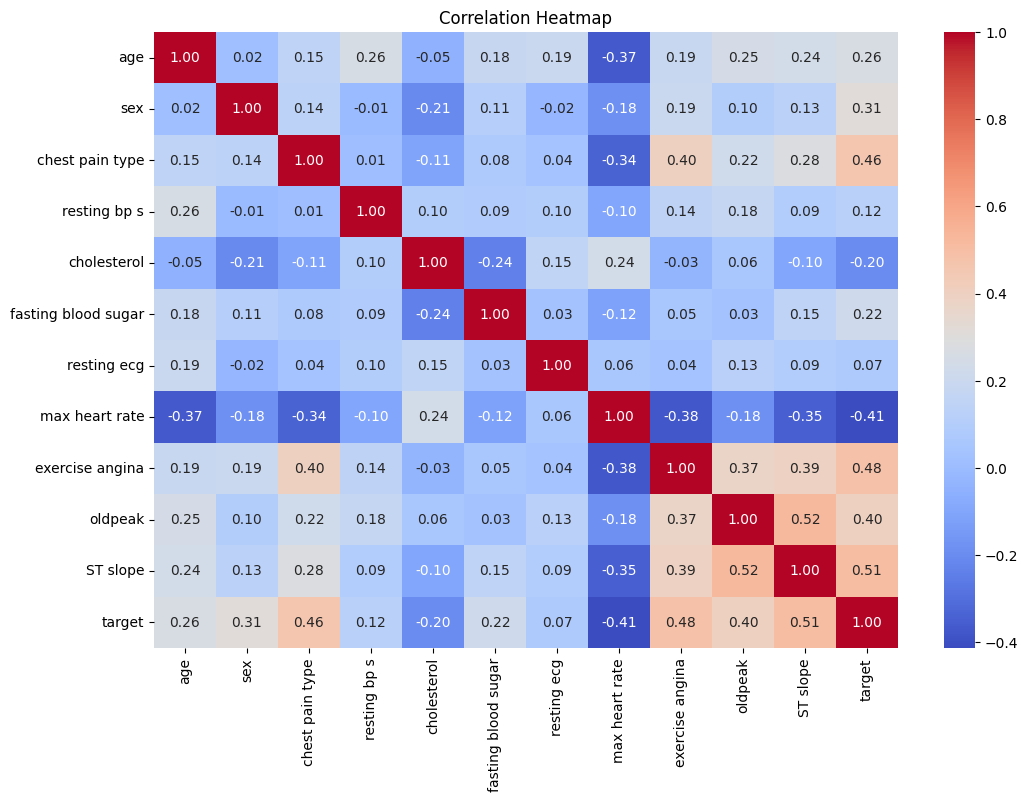

In [ ]:

# 5. Correlation Analysis

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


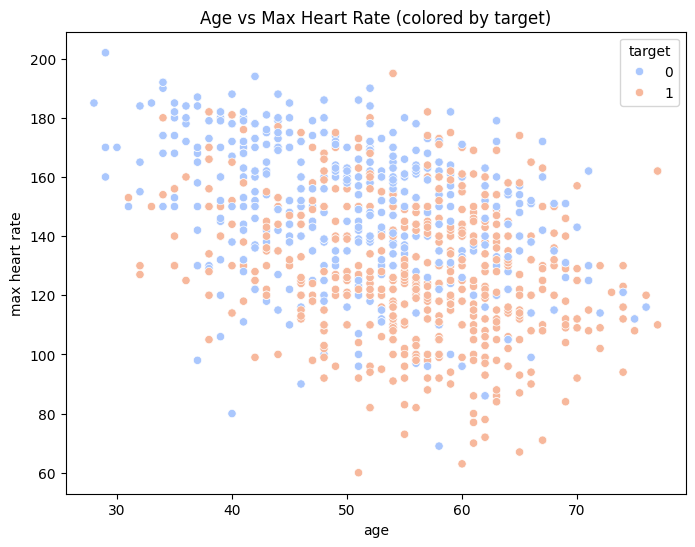

In [ ]:

# Scatter plot for age vs max heart rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='max heart rate', hue='target', data=df, palette='coolwarm')
plt.title('Age vs Max Heart Rate (colored by target)')
plt.show()



# Preprocessing

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
from scipy import stats



# List of categorical columns that need encoding
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']

# One-Hot Encoding for categorical features
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# List of numerical columns to scale
numerical_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Outlier Detection and Handling (Optional)

# Calculate Z-scores for numerical columns
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Set a threshold for Z-score (3 is a typical threshold)
threshold = 3

# Find rows where any Z-score is greater than the threshold (this returns outliers positions)
outliers = np.where(z_scores > threshold)

# Optionally, remove outliers (uncomment the next line if you want to remove outliers)
# df = df[(z_scores < threshold).all(axis=1)]

# Train/Test Split

# Define the target and features
X = df.drop(columns='target')
y = df['target']

# Split the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of training and test sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (952, 16), X_test shape: (238, 16)
y_train shape: (952,), y_test shape: (238,)


# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



# Define the models
models = {
    'Extra Trees': ExtraTreesClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),


}



  0%|          | 0/5 [00:00<?, ?it/s]

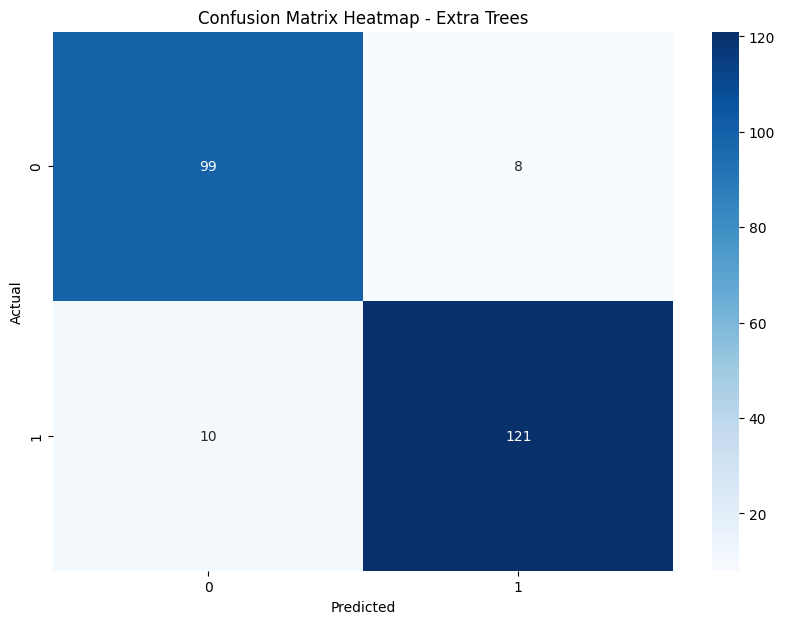

 20%|██        | 1/5 [00:00<00:03,  1.27it/s]


Classification Report for Extra Trees:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       107
           1       0.94      0.92      0.93       131

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



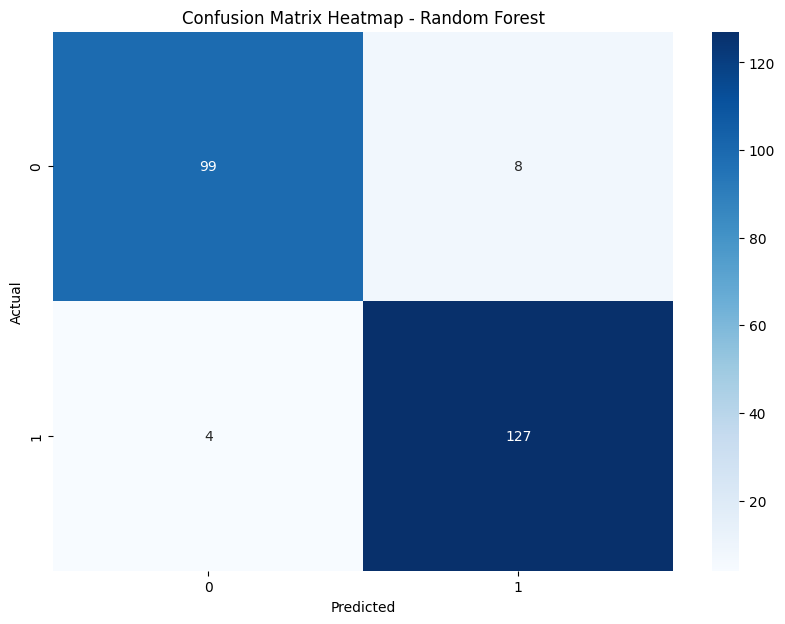

 40%|████      | 2/5 [00:01<00:02,  1.16it/s]


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.94      0.97      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



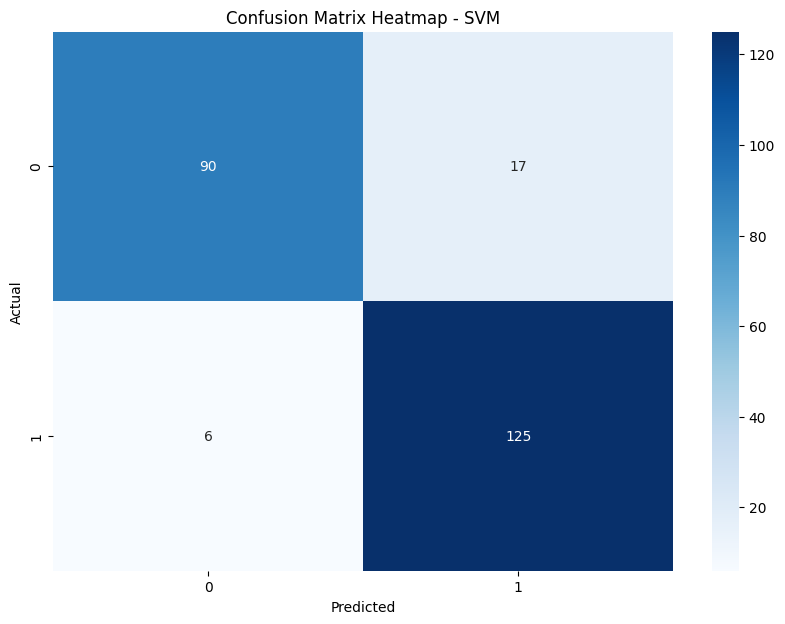

 60%|██████    | 3/5 [00:02<00:01,  1.38it/s]


Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       107
           1       0.88      0.95      0.92       131

    accuracy                           0.90       238
   macro avg       0.91      0.90      0.90       238
weighted avg       0.91      0.90      0.90       238



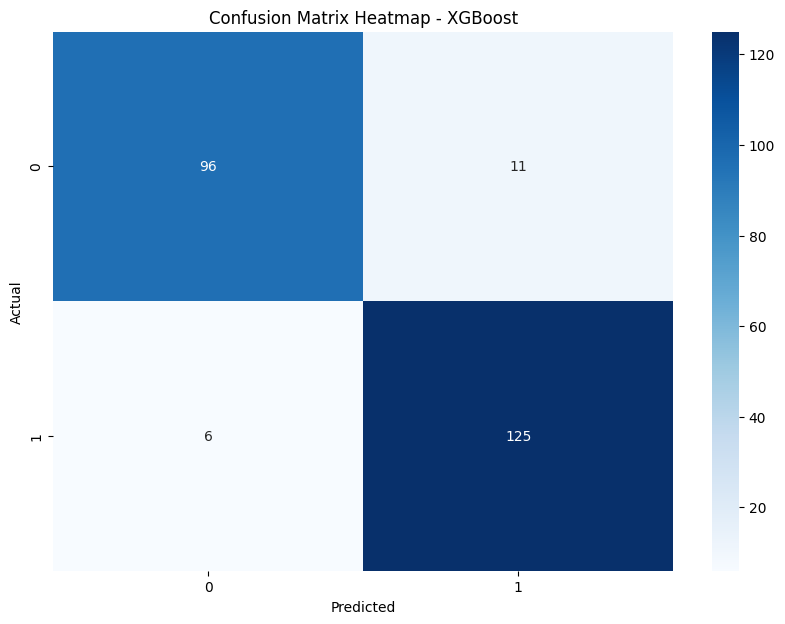

 80%|████████  | 4/5 [00:02<00:00,  1.68it/s]


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       107
           1       0.92      0.95      0.94       131

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



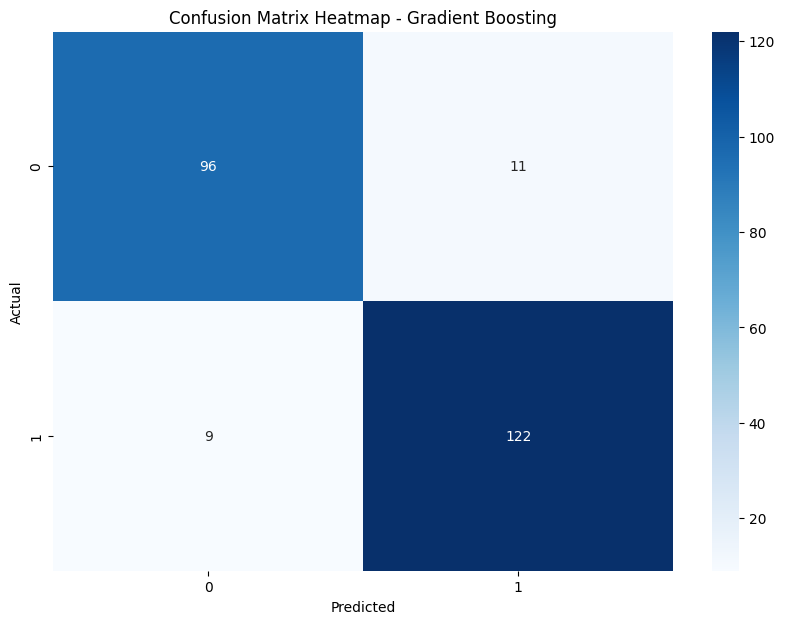

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]


Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.92      0.93      0.92       131

    accuracy                           0.92       238
   macro avg       0.92      0.91      0.91       238
weighted avg       0.92      0.92      0.92       238



In [ ]:

# DataFrame to store results
results = []

# Train and evaluate each model
for name, model in tqdm(models.items()):
    # Train the model and measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    error_rate = 1 - accuracy

    # Save results
    results.append({'Model': name, 'Accuracy': accuracy, 'Recall': recall,
                    'Precision': precision, 'F1 Score': f1, 'Error Rate': error_rate,
                    'Training Time (s)': training_time})

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix Heatmap - {name}')
    plt.show()

    # Print classification report
    class_report = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {name}:\n", class_report)

# Convert results to DataFrame and sort by accuracy
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)


In [ ]:
results_df

,Model,Accuracy,Recall,Precision,F1 Score,Error Rate,Training Time (s)
1,Random Forest,0.949580,0.969466,0.940741,0.954887,0.050420,0.418750
3,XGBoost,0.928571,0.954198,0.919118,0.936330,0.071429,0.083599
0,Extra Trees,0.924370,0.923664,0.937984,0.930769,0.075630,0.337383
4,Gradient Boosting,0.915966,0.931298,0.917293,0.924242,0.084034,0.232399
2,SVM,0.903361,0.954198,0.880282,0.915751,0.096639,0.042834


# Discriminant Function

In [ ]:
# Import necessary libraries for LDA and QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm import tqdm

# Define the models (LDA and QDA)
models = {
    'Linear Discriminant Analysis': LDA(),
    'Quadratic Discriminant Analysis': QDA()
}



  0%|          | 0/2 [00:00<?, ?it/s]

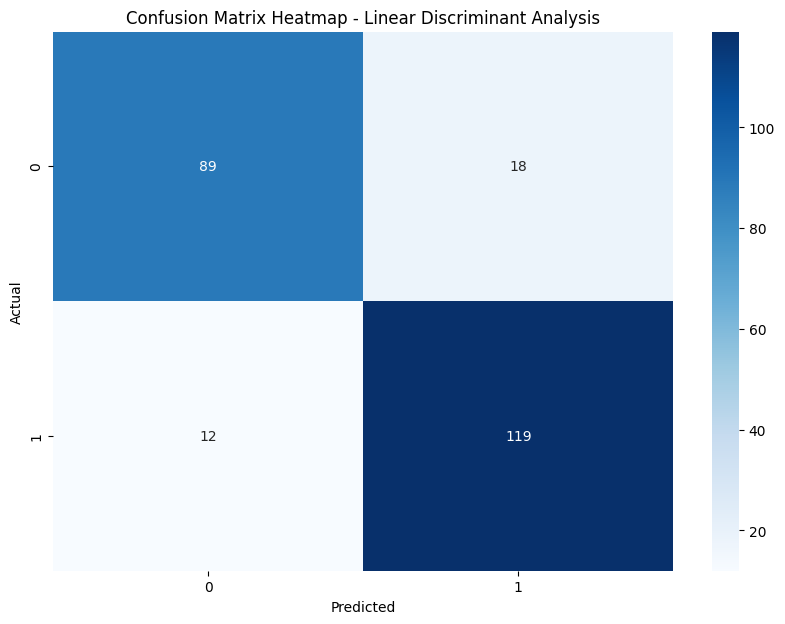

 50%|█████     | 1/2 [00:00<00:00,  1.53it/s]


Classification Report for Linear Discriminant Analysis:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86       107
           1       0.87      0.91      0.89       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


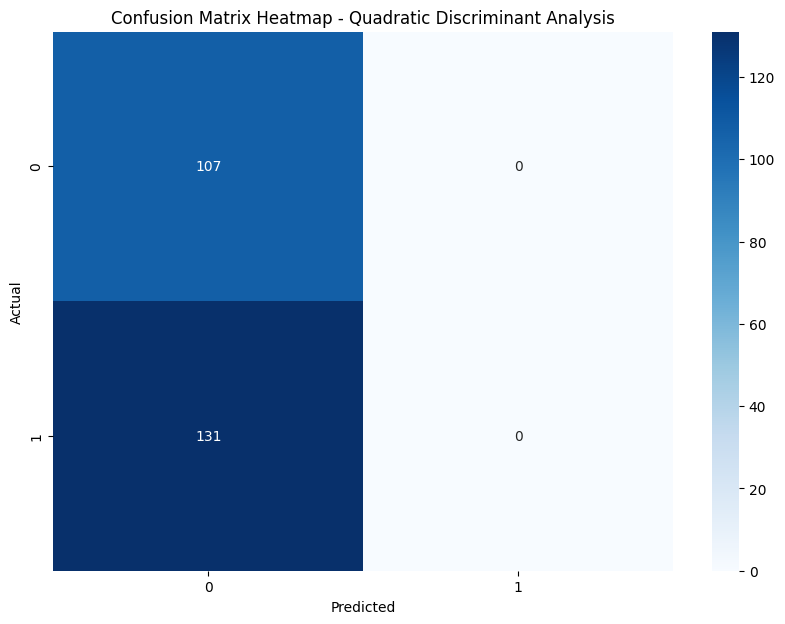

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 2/2 [00:01<00:00,  1.00it/s]


Classification Report for Quadratic Discriminant Analysis:
               precision    recall  f1-score   support

           0       0.45      1.00      0.62       107
           1       0.00      0.00      0.00       131

    accuracy                           0.45       238
   macro avg       0.22      0.50      0.31       238
weighted avg       0.20      0.45      0.28       238



In [ ]:
# DataFrame to store results
results = []

# Train and evaluate each model
for name, model in tqdm(models.items()):
    # Train the model and measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    error_rate = 1 - accuracy

    # Save results
    results.append({'Model': name, 'Accuracy': accuracy, 'Recall': recall,
                    'Precision': precision, 'F1 Score': f1, 'Error Rate': error_rate,
                    'Training Time (s)': training_time})

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix Heatmap - {name}')
    plt.show()

    # Print classification report
    class_report = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {name}:\n", class_report)

# Convert results to DataFrame and sort by accuracy
resulx_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)



In [ ]:
resulx_df

,Model,Accuracy,Recall,Precision,F1 Score,Error Rate,Training Time (s)
0,Linear Discriminant Analysis,0.87395,0.908397,0.868613,0.88806,0.12605,0.156104
1,Quadratic Discriminant Analysis,0.44958,0.000000,0.000000,0.00000,0.55042,0.006885


# ML vs DF Comparison

In [ ]:
result_df=pd.concat([results_df,resulx_df],axis=0)
result_df

,Model,Accuracy,Recall,Precision,F1 Score,Error Rate,Training Time (s)
1,Random Forest,0.949580,0.969466,0.940741,0.954887,0.050420,0.418750
3,XGBoost,0.928571,0.954198,0.919118,0.936330,0.071429,0.083599
0,Extra Trees,0.924370,0.923664,0.937984,0.930769,0.075630,0.337383
4,Gradient Boosting,0.915966,0.931298,0.917293,0.924242,0.084034,0.232399
2,SVM,0.903361,0.954198,0.880282,0.915751,0.096639,0.042834
0,Linear Discriminant Analysis,0.873950,0.908397,0.868613,0.888060,0.126050,0.156104
1,Quadratic Discriminant Analysis,0.449580,0.000000,0.000000,0.000000,0.550420,0.006885


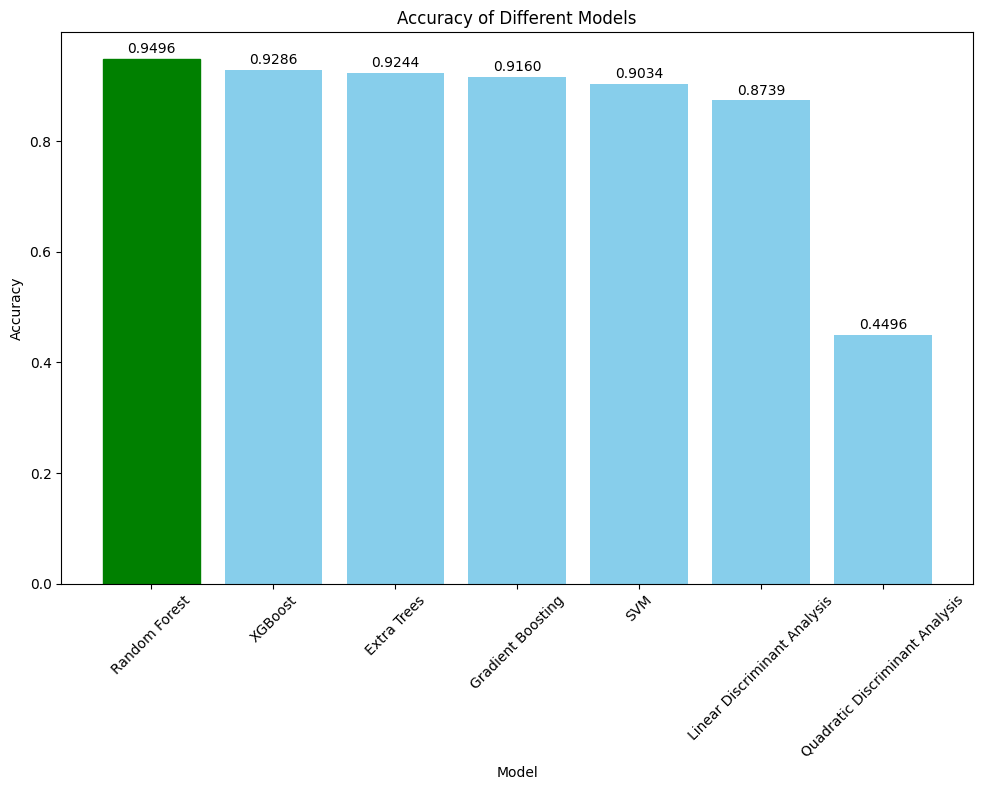

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have sorted the DataFrame result_df by accuracy
result_df = result_df.sort_values(by='Accuracy', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))

# Plotting Accuracy for each model
bars = plt.bar(result_df['Model'], result_df['Accuracy'], color='skyblue')

# Highlighting the first model with green
bars[0].set_color('green')

# Adding accuracy values on top of each bar with four decimal places
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}',
             ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Rotating x labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


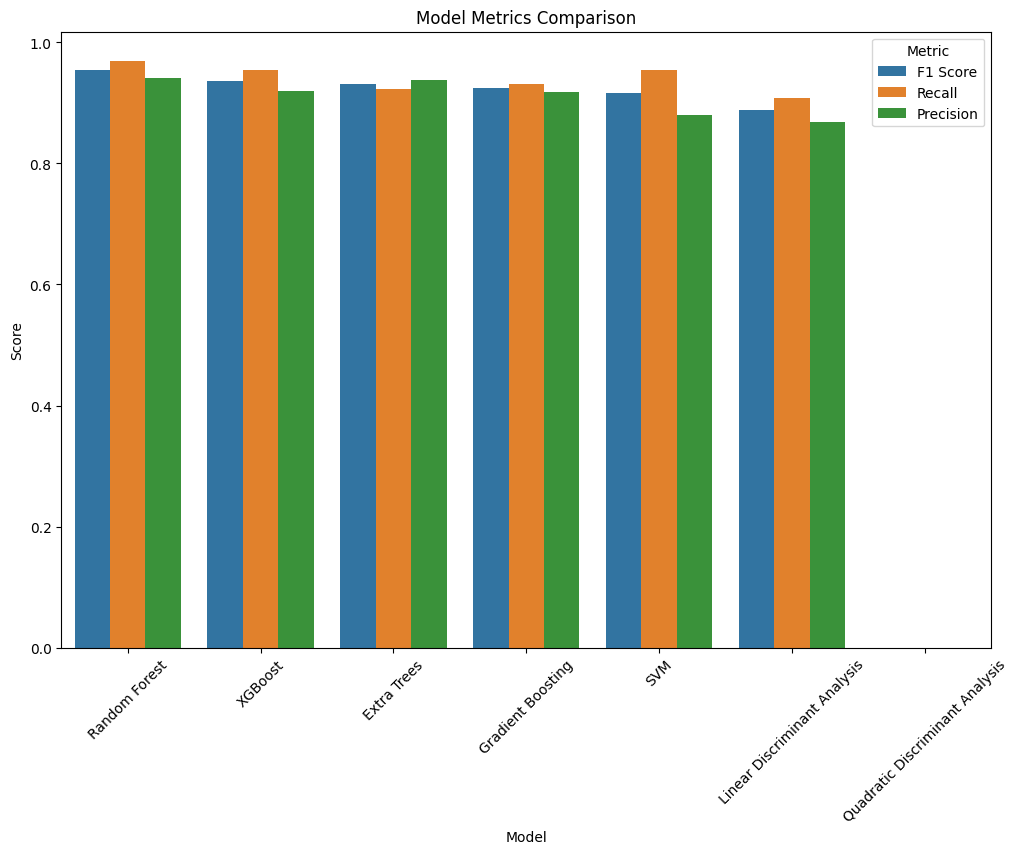

In [ ]:

# Grouped bar chart for F1 Score, Recall, and Precision
metrics_df = result_df[['Model', 'F1 Score', 'Recall', 'Precision']].melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df)
plt.title('Model Metrics Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()
